# バイアス付きのデータを作成する

In [89]:
import numpy as np 
import pandas as pd
import os 
import matplotlib.pyplot as plt 

In [90]:
# dataset
dataset_name = "human"
# dataset_name = "celegans"

In [91]:
df = pd.read_csv("../../data/maked/default/" + dataset_name + ".csv", header=0)
df.head()

,compound,protein,label
0,CC[C@@]1(C[C@@H]2C3=CC(=C(C=C3CCN2C[C@H]1CC(C)...,MSPLNQSAEGLPQEASNRSLNATETSEAWDPRTLQALKISLAVVLS...,0
1,C1COCCO1,MSTSSLRRQMKNIVHNYSEAEIKVREATSNDPWGPSSSLMSEIADL...,1
2,CCCC(=O)C1=CN=CC=C1,MAGAGPKRRALAAPAAEEKEEAREKMLAAKSADGSAPAGEGEGVTL...,0
3,CCN[C@H]1CN(S(=O)(=O)C2=C1C=C(S2)S(=O)(=O)N)CCCOC,MVVMNSLRVILQASPGKLLWRKFQIPRFMPARPCSLYTCTYKTRNR...,1
4,C[C@H](C[C@@H](C(=O)O)N)C(=O)O,MKLKLKNVFLAYFLVSIAGLLYALVQLGQPCDCLPPLRAAAEQLRQ...,0


In [92]:
df = df.sample(frac=1, random_state=0)
df

,compound,protein,label
4120,C1=CC2=C3C(=C1)C=CC4=C3C(=CC5=C4[C@H]6[C@H](O6...,MAGYLRVVRSLCRASGSRPAWAPAALTAPTSQEQPRRHYADKRIKV...,0
6726,CCCCCCCCCCCCCCCC(=O)OCC(CO)OC(=O)CCCCCCC/C=C\C...,MKGNSTLATTSKNITSGLHFGLVNISGNNESTLNCSQKPSDKHLDA...,0
5258,C1=CC(=C(C(=C1)Cl)CC(=O)N=C(N)N)Cl,MATARTFGPEREAEPAKEARVVGSELVDTYTVYIIQVTDGSHEWTV...,1
2266,C1CN(CCC1C(=O)N2CCN(CC2)S(=O)(=O)C3=CC4=C(C=C3...,MATAGNPWGWFLGYLILGVAGSLVSGSCSQIINGEDCSPHSQPWQA...,1
3181,C(C(CO)O)O,MPAELLLLLIVAFASPSCQVLSSLRMAAILDDQTVCGRGERLALAL...,1
...,...,...,...
4931,C1CN(C[C@H](N1)C(=O)NCCCS)CC2=CC=C(C=C2)F,MAQALPWLLLWMGAGVLPAHGTQHGIRLPLRSGLGGAPLGLRLPRE...,1
3264,C1=C[C@@H]([C@H]([C@@H]1N2C=NC3=C2N=CN=C3N)O)O,MSDKLPYKVADIGLAAWGRKALDIAENEMPGLMRMRERYSASKPLK...,1
1653,C(C(CO)O)O,MPFPVTTQGPPQPAPPPNRYGVSSPISLAVPKETDCLLTQRLIETL...,1
2607,CC(C)NCC(COC1=CC=CC2=CC=CC=C21)O,MSANATLKPLCPILEQMSRLQSHSNTSIRYIDHAAVLLHGLASLLG...,1


In [93]:
N = len(df)
train_len = int(N * 0.1)

In [94]:
df_test = df[:train_len]
df = df[train_len:]

In [95]:
df_compound = pd.DataFrame(df["compound"].unique(), columns=["compound"])
df_compound.head()

,compound
0,[Zn]
1,C(CS)O
2,C(C(CO)O)O
3,CC1=CC2=C(C=C1C)N(C3=NC(=O)NC(=O)C3=N2)C[C@@H]...
4,C1CC(=O)NC2=C1C=CC(=C2)OCCCCN3CCN(CC3)C4=C(C(=...


In [96]:
# df_compound['compound_id'] = df_compound['compound'].factorize()[0]
# df = pd.merge(df, df_compound, how="left", on="compound")
# df.head()

## SMILES形式のデータから分子量を計算する

In [97]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors

In [98]:
df_compound["weight"] = df_compound["compound"].map(lambda sm: rdMolDescriptors._CalcMolWt(Chem.MolFromSmiles(sm)))
df_compound.head()

RDKit WARNING: [17:37:35] WARNING: not removing hydrogen atom without neighbors
[17:37:35] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:37:35] WARNING: not removing hydrogen atom without neighbors
[17:37:35] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:37:35] WARNING: not removing hydrogen atom without neighbors
[17:37:35] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:37:35] WARNING: not removing hydrogen atom without neighbors
[17:37:35] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:37:35] WARNING: not removing hydrogen atom without neighbors
[17:37:35] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:37:35] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:37:35] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [17:37:35] WARNING: not removing hydrogen atom without neighbors
[17:37:35] WARNING: not removing hy

,compound,weight
0,[Zn],65.390
1,C(CS)O,78.136
2,C(C(CO)O)O,92.094
3,CC1=CC2=C(C=C1C)N(C3=NC(=O)NC(=O)C3=N2)C[C@@H]...,785.557
4,C1CC(=O)NC2=C1C=CC(=C2)OCCCCN3CCN(CC3)C4=C(C(=...,448.394


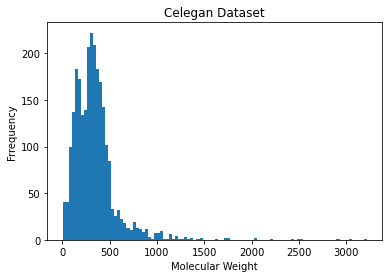

In [99]:
fig, ax = plt.subplots()

ax.set_xlabel("Molecular Weight")
ax.set_ylabel("Frrequency")
# ax.set_title("Human Dataset")
# ax.set_title("Celegan Dataset")

fig.patch.set_facecolor('white')
ax.hist(df_compound["weight"].values, bins=100)

# fig.savefig("human_hist.png")
# fig.savefig("celegan_hist.png")

plt.show()

In [100]:
df_compound["weight_norm"] = (df_compound["weight"] - df_compound["weight"].mean()) / df_compound["weight"].std()
df_compound.head()

,compound,weight,weight_norm
0,[Zn],65.390,-1.102164
1,C(CS)O,78.136,-1.050709
2,C(C(CO)O)O,92.094,-0.994362
3,CC1=CC2=C(C=C1C)N(C3=NC(=O)NC(=O)C3=N2)C[C@@H]...,785.557,1.805080
4,C1CC(=O)NC2=C1C=CC(=C2)OCCCCN3CCN(CC3)C4=C(C(=...,448.394,0.443986


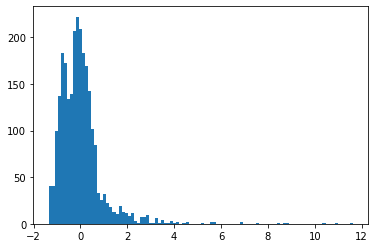

In [101]:
plt.hist(df_compound["weight_norm"].values, bins=100)
plt.show()

In [102]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(x))

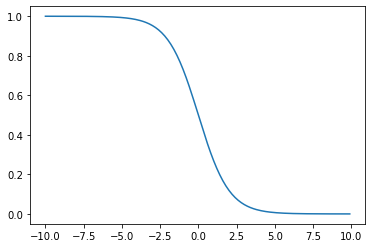

In [103]:
x = np.arange(-10, 10, 0.1)
y = list(map(sigmoid, x))
plt.plot(x,y)
plt.show()

In [104]:
df_compound["prob"] = df_compound["weight_norm"].map(sigmoid)
df_compound.head()

,compound,weight,weight_norm,prob
0,[Zn],65.390,-1.102164,0.750665
1,C(CS)O,78.136,-1.050709,0.740911
2,C(C(CO)O)O,92.094,-0.994362,0.729949
3,CC1=CC2=C(C=C1C)N(C3=NC(=O)NC(=O)C3=N2)C[C@@H]...,785.557,1.805080,0.141234
4,C1CC(=O)NC2=C1C=CC(=C2)OCCCCN3CCN(CC3)C4=C(C(=...,448.394,0.443986,0.390792


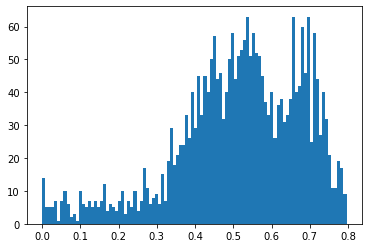

In [105]:
plt.hist(df_compound["prob"].values, bins=100)
plt.show()

In [106]:
import random

In [107]:
def observed(x):
    coin = random.random()
    if x > coin:
        return 1
    else:
        return 0

In [108]:
df_compound["observed"] = df_compound["prob"].map(observed)
df_compound.head()

,compound,weight,weight_norm,prob,observed
0,[Zn],65.390,-1.102164,0.750665,1
1,C(CS)O,78.136,-1.050709,0.740911,1
2,C(C(CO)O)O,92.094,-0.994362,0.729949,1
3,CC1=CC2=C(C=C1C)N(C3=NC(=O)NC(=O)C3=N2)C[C@@H]...,785.557,1.805080,0.141234,0
4,C1CC(=O)NC2=C1C=CC(=C2)OCCCCN3CCN(CC3)C4=C(C(=...,448.394,0.443986,0.390792,0


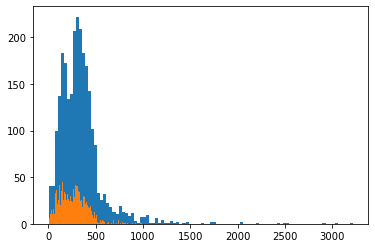

In [109]:
df_compound_new = df_compound[df_compound["observed"]==1]
plt.hist(df_compound["weight"].values, bins=100)
plt.hist(df_compound_new["weight"].values, bins=100)
plt.show()

In [110]:
df = pd.merge(df, df_compound[["compound", "observed"]], how="left", on="compound")
df.head()

,compound,protein,label,observed
0,[Zn],MTGSNMSDALANAVCQRCQARFSPAERIVNSNGELYHEHCFVCAQC...,1,1
1,C(CS)O,MAYYQEPSVETSIIKFKDQDFTTLRDHCLSMGRTFKDETFPAADSS...,1,1
2,C(C(CO)O)O,MLSCFRLLSRHISPSLASLRPVRCCFALPLRWAPGRPLDPRQIAPR...,1,1
3,CC1=CC2=C(C=C1C)N(C3=NC(=O)NC(=O)C3=N2)C[C@@H]...,MAAAGGARLLRAASAVLGGPAGRWLHHAGSRAGSSGLLRNRGPGGS...,1,0
4,C1CC(=O)NC2=C1C=CC(=C2)OCCCCN3CCN(CC3)C4=C(C(=...,MSANATLKPLCPILEQMSRLQSHSNTSIRYIDHAAVLLHGLASLLG...,1,0


In [111]:
df_observed = df[df["observed"] == 1]
df_observed.head()

,compound,protein,label,observed
0,[Zn],MTGSNMSDALANAVCQRCQARFSPAERIVNSNGELYHEHCFVCAQC...,1,1
1,C(CS)O,MAYYQEPSVETSIIKFKDQDFTTLRDHCLSMGRTFKDETFPAADSS...,1,1
2,C(C(CO)O)O,MLSCFRLLSRHISPSLASLRPVRCCFALPLRWAPGRPLDPRQIAPR...,1,1
5,CCCCCCC=CCCCCCCCC(=O)O,MAGENHQWQGSILYNMLMSAKQTRAAPEAPETRLVDQCWGCSCGDE...,0,1
6,C[C@@H](CO)NC(=O)[C@H]1CN([C@@H]2CC3=CNC4=CC=C...,MSANATLKPLCPILEQMSRLQSHSNTSIRYIDHAAVLLHGLASLLG...,1,1


In [112]:
len(df_observed)

3378

In [113]:
count_compound = df_observed["compound"].value_counts().to_dict()
def calc_weight(x):
    weight = 1 / count_compound[x]
    weight = max( weight, 0.1)
    weight = min( weight, 0.9)
    return weight

In [114]:
df_observed["weight"] = df_observed["compound"].map(calc_weight)
df_observed.head()

/tmp/ipykernel_2945775/1975894560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_observed["weight"] = df_observed["compound"].map(calc_weight)


,compound,protein,label,observed,weight
0,[Zn],MTGSNMSDALANAVCQRCQARFSPAERIVNSNGELYHEHCFVCAQC...,1,1,0.100000
1,C(CS)O,MAYYQEPSVETSIIKFKDQDFTTLRDHCLSMGRTFKDETFPAADSS...,1,1,0.100000
2,C(C(CO)O)O,MLSCFRLLSRHISPSLASLRPVRCCFALPLRWAPGRPLDPRQIAPR...,1,1,0.100000
5,CCCCCCC=CCCCCCCCC(=O)O,MAGENHQWQGSILYNMLMSAKQTRAAPEAPETRLVDQCWGCSCGDE...,0,1,0.333333
6,C[C@@H](CO)NC(=O)[C@H]1CN([C@@H]2CC3=CNC4=CC=C...,MSANATLKPLCPILEQMSRLQSHSNTSIRYIDHAAVLLHGLASLLG...,1,1,0.250000


In [115]:
# df_observed[["compound", "protein", "label", "weight"]].to_csv("../../data/maked/bias/train_" + dataset_name + ".csv", index=None)
# df_test.to_csv("../../data/maked/bias/test_" + dataset_name + ".csv", index=None)


In [116]:
count_compound = df_observed["compound"].value_counts().to_dict()
def counting(x):
    return count_compound[x]

In [117]:
df_compound_new["link"] = df_compound_new["compound"].map(counting)
df_compound_new.head()

/tmp/ipykernel_2945775/2300487589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compound_new["link"] = df_compound_new["compound"].map(counting)


,compound,weight,weight_norm,prob,observed,link
0,[Zn],65.390,-1.102164,0.750665,1,181
1,C(CS)O,78.136,-1.050709,0.740911,1,28
2,C(C(CO)O)O,92.094,-0.994362,0.729949,1,239
5,CCCCCCC=CCCCCCCCC(=O)O,254.414,-0.339092,0.583970,1,3
6,C[C@@H](CO)NC(=O)[C@H]1CN([C@@H]2CC3=CNC4=CC=C...,325.412,-0.052480,0.513117,1,4


In [120]:
li = []
for i in range(50):
    if i < 49:
        df_new = df_compound_new[(df_compound_new["weight"] < (i+1) * 20) & (i * 20 <= df_compound_new["weight"])]
    else:
        df_new = df_compound_new[(i * 20 <= df_compound_new["weight"])]
    if 0 == len(df_new["link"].values):
        m = 0
    else:
        m = np.sum(df_new["link"].values)
    li.append(m)

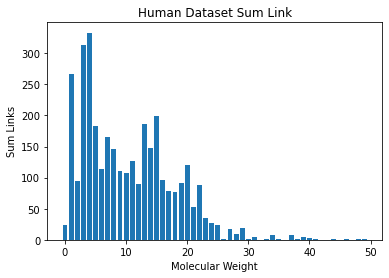

In [121]:
fig, ax = plt.subplots()
# Axesに棒グラフを追加
ax.bar(range(len(li)), li)
fig.patch.set_facecolor('white')
ax.set_title("Human Dataset Sum Link")
ax.set_xlabel("Molecular Weight")
ax.set_ylabel("Sum Links")
plt.show()
fig.savefig("compound_bias_sum_link.png")